In [1]:
!pip install keras-cv keras-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 47.7 MB/s eta 0:00:00


In [2]:
import json
import math
import keras_cv
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import losses
from keras import metrics
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget -nc https://archive.org/download/lions_cheetahs/lions_cheetahs.zip

--2024-11-19 17:38:42--  https://archive.org/download/lions_cheetahs/lions_cheetahs.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia802708.us.archive.org/16/items/lions_cheetahs/lions_cheetahs.zip [following]
--2024-11-19 17:38:42--  https://ia802708.us.archive.org/16/items/lions_cheetahs/lions_cheetahs.zip
Resolving ia802708.us.archive.org (ia802708.us.archive.org)... 207.241.228.248
Connecting to ia802708.us.archive.org (ia802708.us.archive.org)|207.241.228.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74771166 (71M) [application/zip]
Saving to: ‘lions_cheetahs.zip’

lions_cheetahs.zip  100%[===================>]  71.31M  79.1MB/s    in 0.9s    

2024-11-19 17:38:43 (79.1 MB/s) - ‘lions_cheetahs.zip’ saved [74771166/74771166]



In [4]:
!unzip -nq lions_cheetahs.zip

In [5]:
!ls

images	lions_cheetahs.zip  sample_data


In [6]:
!ls images

Cheetahs  Lions


In [7]:
!ls images/Cheetahs/

0052cb267268c59e.jpg  055dbbcca8626dbb.jpg  1da9b32b6e25e64c.jpg  75ea322880cfcc3a.jpg
00707659aba29334.jpg  05632fadcb5e1e9c.jpg  1ebe26a6abe51106.jpg  767e3c2968ff1890.jpg
007f9ffc01c7b106.jpg  06434b4d5989df37.jpg  215389b1cbbca9db.jpg  775f869903916081.jpg
00bb45a8568a3474.jpg  07642e275bb2b869.jpg  223fc16f8023cf96.jpg  784940fed90cccc2.jpg
00c8d36882dd6d37.jpg  07b7a0704a9a543b.jpg  23ab0e17849b7d7d.jpg  7f33de86429cef7f.jpg
00d100b0231b60e6.jpg  08108fb36d20a11d.jpg  2546b57e18682a68.jpg  8b48ed579956d124.jpg
00d9eb862ba3dfc6.jpg  09017fd0f60f309a.jpg  281b8d0a1d540fd1.jpg  8f34ab7a9b7a8f9b.jpg
012f5ecbf49e1da0.jpg  09ead945be525356.jpg  2a782f57d7ce6efc.jpg  9a470427f0a875d2.jpg
01750ba1a197e3ad.jpg  0ae4f7841c26ba0d.jpg  2f6bb1f322b6d58a.jpg  9d6b7b5bb7d5efcd.jpg
01d688c043bdbfbb.jpg  0c20fa69621a2e6c.jpg  2fd0d44cf194d16c.jpg  a9be4e0ac3ff7f4e.jpg
0230496e4a8ed917.jpg  0c61b8d86a3e0889.jpg  3054d68c25d49d54.jpg  b10d508caab7ce0b.jpg
02871f24d5abe59c.jpg  0c6e90e19f2b2bbc.jpg 

In [8]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    'images',
    image_size = (224, 224),
    validation_split = 0.3,
    subset = 'both',
    seed = 123,
)

Found 200 files belonging to 2 classes.
Using 140 files for training.
Using 60 files for validation.


In [9]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
#Shuffle the dataset to increase diversity of batches
train_ds = train_ds.shuffle(
    10 * 32,
    reshuffle_each_iteration = True
)

(32, 224, 224, 3)


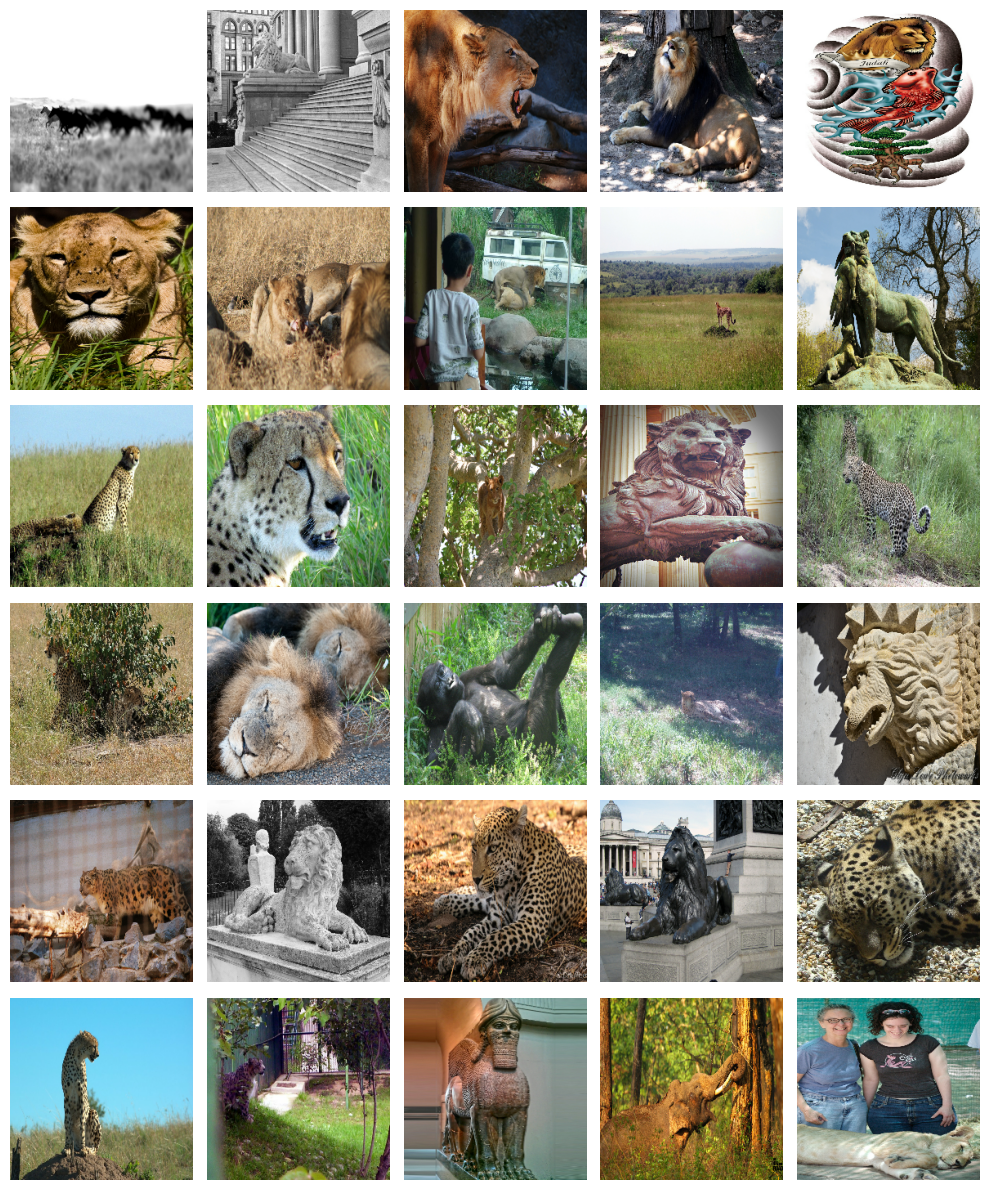

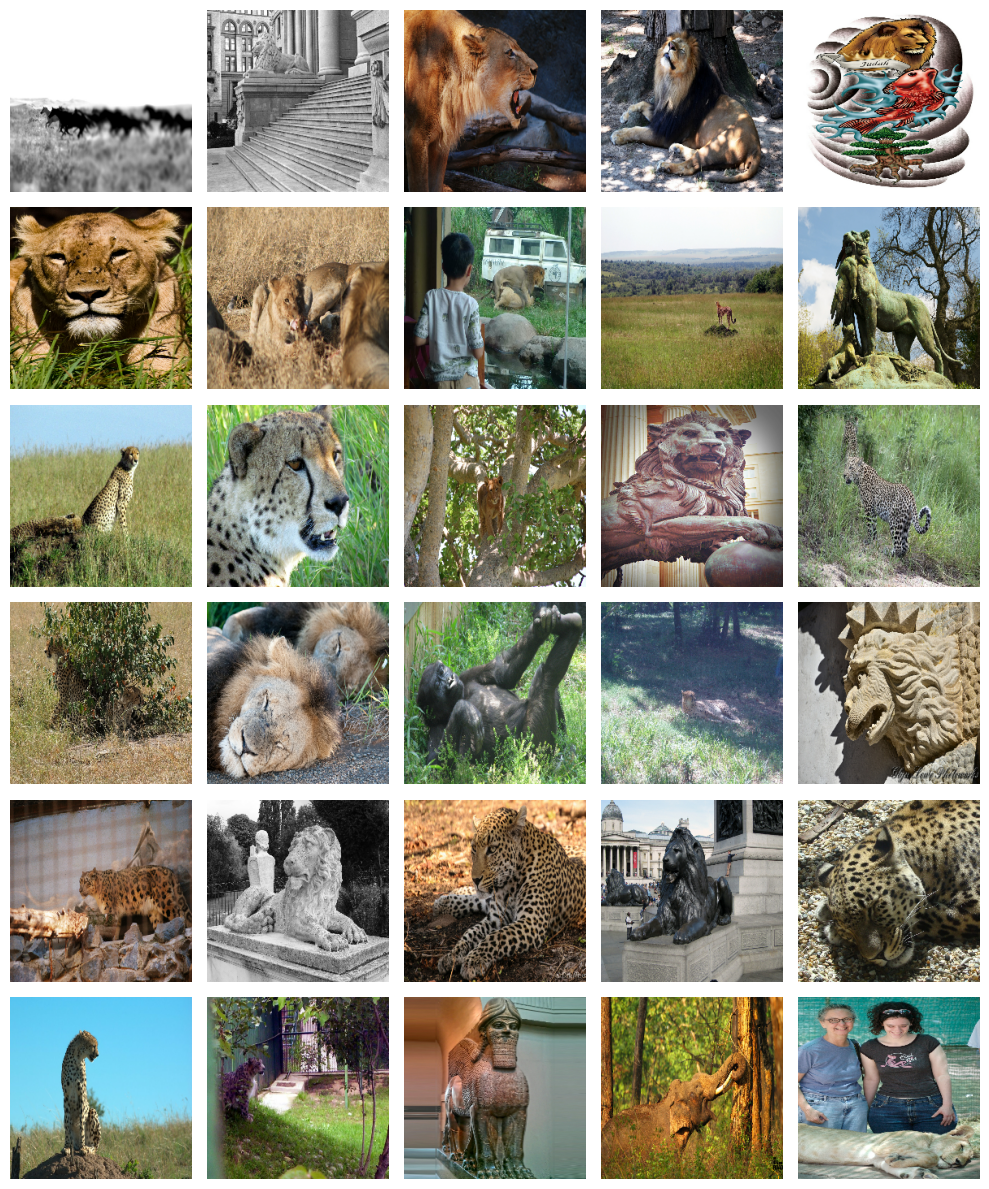

In [12]:
images = next(iter(train_ds.take(1)))[0]
print(images.shape)
keras_cv.visualization.plot_image_gallery(images, value_range = (0, 255))

In [13]:
model = keras_cv.models.ImageClassifier.from_preset(
    'efficientnetv2_b0_imagenet',
    num_classes = 2
)

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.AdamW(),
    metrics = ['accuracy']
)

100%|██████████| 1.79k/1.79k [00:00<00:00, 4.74MB/s]


100%|██████████| 23.1M/23.1M [00:01<00:00, 20.2MB/s]


In [14]:
r = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 155s 17s/step - accuracy: 0.6270 - loss: 0.6255 - val_accuracy: 0.8833 - val_loss: 0.3515
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - accuracy: 0.9759 - loss: 0.2532 - val_accuracy: 0.9333 - val_loss: 0.1448
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.9896 - loss: 0.0859 - val_accuracy: 0.9667 - val_loss: 0.1066
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.9961 - loss: 0.0287 - val_accuracy: 0.9333 - val_loss: 0.1546
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 0.8667 - val_loss: 0.2247
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.9904 - loss: 0.0191 - val_accuracy: 0.8500 - val_loss: 0.3194
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.8333 - val_loss: 0.3572
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 0.8667 - val_loss:

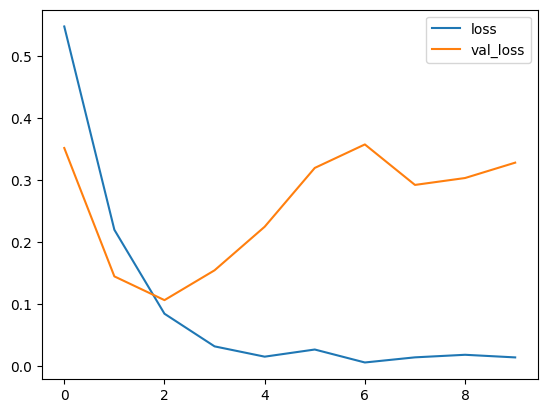

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

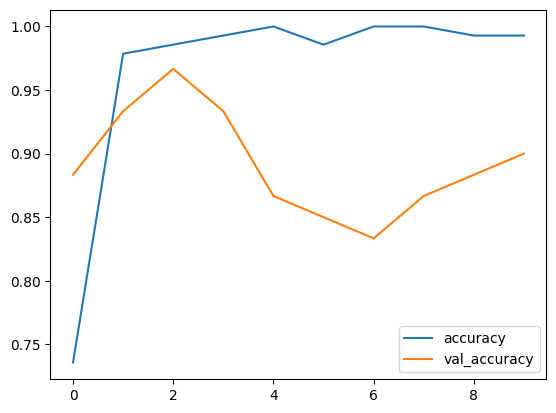

In [16]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

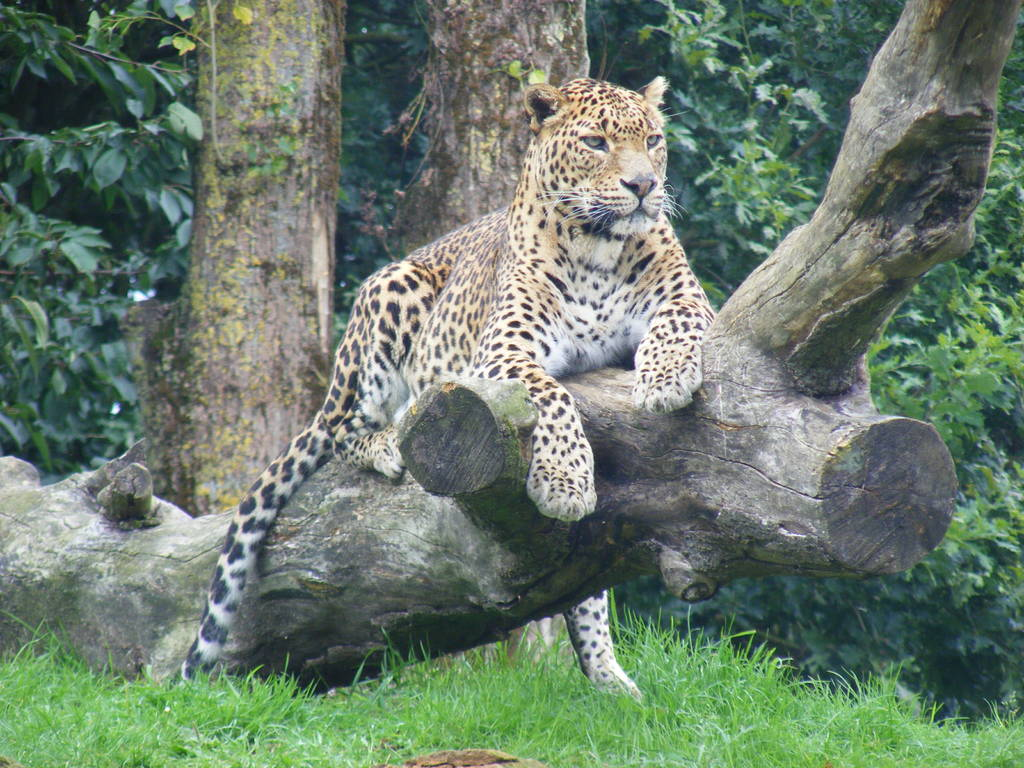

In [17]:
#Make a prediction on a single image
from PIL import Image

path = 'images/Cheetahs/ed51aa4321f10a21.jpg'
im = Image.open(path)
im

In [18]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [19]:
np_im = np.asarray(im)

In [20]:
np_im.shape

(768, 1024, 3)

In [21]:
resizing = keras_cv.layers.Resizing(
    224,
    224,
    crop_to_aspect_ratio = True
)

In [22]:
np_im_rs = resizing(np_im)
np_im_rs

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 42.4949  ,  56.209183,  51.94388 ],
        [ 46.663265,  72.81122 ,  58.234695],
        [ 96.311226, 133.68367 , 116.34183 ],
        ...,
        [ 55.928608,  80.35718 ,  83.14293 ],
        [ 55.07668 ,  78.22461 ,  86.28593 ],
        [ 59.423473,  82.06633 ,  94.39796 ]],

       [[ 43.42347 ,  82.5     ,  41.918365],
        [ 77.63775 , 119.20918 ,  90.051025],
        [105.90306 , 146.36224 , 133.7857  ],
        ...,
        [ 34.734688,  66.0204  ,  52.806118],
        [ 48.82666 ,  80.11237 ,  67.61237 ],
        [ 42.872494,  74.15821 ,  61.658207]],

       [[ 79.239784, 122.85713 ,  74.27039 ],
        [ 80.67346 , 127.244896,  73.959175],
        [ 69.41837 , 117.34694 ,  66.19387 ],
        ...,
        [ 47.051003,  79.12243 ,  63.979576],
        [ 28.734863,  66.52058 ,  43.592007],
        [ 49.852028,  89.311195,  63.979588]],

       ...,

       [[133.6836  , 191.75505 , 139.541   ],
        [ 93.

In [23]:
np_im_rs.shape

TensorShape([224, 224, 3])

In [24]:
x = tf.reshape(np_im_rs, (1, 224, 224, 3))

In [25]:
out = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [27]:
out

array([[9.9969351e-01, 3.0656825e-04]], dtype=float32)

In [26]:
val_ds.class_names

['Cheetahs', 'Lions']